# Projet CO2 à finir maison 

## Avancées faites sur site

In [22]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt 


# Importation et nettoyage du jeu de données issues de RTE

La première étape est d'importer le jeu de données sur la production d'électricité française. Les données sont issue de RTE pour la période s'étalant de Janvier 2021 à janvier 2022. Ces données ont été vérifiée et consolidées plusieurs fois par les organismes compétents et sont donc fiables. 

In [3]:
data = pd.read_csv("../Data/eco2mix-national-cons-def.csv", sep=";", header=0)
data

,Périmètre,Nature,Date,Heure,Date et Heure,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),...,Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
0,France,Données consolidées,2021-08-07,18:45,2021-08-07T18:45:00+02:00,NaN,39350,39550,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,France,Données consolidées,2021-08-07,21:45,2021-08-07T21:45:00+02:00,NaN,38000,38200,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données consolidées,2021-08-07,22:15,2021-08-07T22:15:00+02:00,NaN,38900,39100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,France,Données consolidées,2021-08-07,23:45,2021-08-07T23:45:00+02:00,NaN,40300,40400,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,Données consolidées,2021-08-08,01:30,2021-08-08T01:30:00+02:00,34655.0,35800,35200,60.0,8.0,...,0.0,276.0,240.0,58.0,5072.0,856.0,638.0,481.0,296.0,332.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,France,Données consolidées,2021-01-10,15:45,2021-01-10T15:45:00+01:00,NaN,68850,69100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35036,France,Données consolidées,2021-01-11,01:30,2021-01-11T01:30:00+01:00,73385.0,72500,73600,97.0,1528.0,...,4.0,2915.0,4947.0,94.0,3520.0,2280.0,260.0,502.0,286.0,330.0
35037,France,Données consolidées,2021-01-11,04:45,2021-01-11T04:45:00+01:00,NaN,68350,70000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35038,France,Données consolidées,2021-01-11,08:00,2021-01-11T08:00:00+01:00,86759.0,85800,88100,120.0,2289.0,...,1.0,3118.0,5570.0,92.0,5236.0,5889.0,2664.0,493.0,278.0,323.0


Une fois ce jeu de données importé, il est possible de visualiser les données contenues. On remarque d'ailleurs qu'il existe plusieurs lignes de données où des données sont manquantes car l'index temporel utilisé est trop rafiné. De plus, certaines colonnes ne seront pas utilisées pour la suite de l'étude. Par exemple, les colonnes périmètre et nature des données ne seront plus utiles par la suite, de la même manière que les colonnes Date et Heure font doublons avec la colonne "Date et Heure" qui regroupe les même données. On peut donc supprimer ces colonnes afin d'alléger notre tableau. 

In [4]:
data.drop(columns=["Périmètre","Nature","Date","Heure"], inplace=True)

Par la suite, on utilise la colonne "Date et Heure" pour indexer notre tableau afin de s'assurer d'avoir des données liées à une temporalité. De cette manière on peut trier et analyser nos données de manière plus aisées. De plus, dans le cadre de ce Notebook j'utilise une librairie Python appelée "Pandas" qui a été spécialement conçue pour travailler avec de telles données temporelle, et pour l'utiliser à son plein potentiel, il faut désigner l'index comme étant une date et une heure. 

In [5]:
data.set_index("Date et Heure", inplace=True)
data.index = pd.to_datetime(data.index, utc=True)
data.index = data.index.tz_convert("Europe/Paris")


Une fois la dataframe (= le tableau de données) bien reformée, on va pouvoir supprimer les lignes inutiles. Par lignes inutiles j'entends ici les lignes comprenant des "NaN" comme dans le premier tableau. En effet, ces lignes faisant état d'un manque de données, il est inutile de les conserver pour la suite de l'étude. De plus, afin de s'assurer qu'il ne manque pas d'information après suppression de ces lignes, on peut vérifier combien de lignes il nous reste après suppression. 

In [6]:
data.dropna(inplace=True)
data.shape

(17520, 32)

On remarque que seulement la moitié des lignes a été conservé. Cela renforce l'idée première selon laquelle l'index temporel était trop raffiné pour les données. En effet, en immaginant que la base de donnée était mise à jour toutes les 15 minutes, mais que les données réelles n'étaient communiquées que toutes les 30 minutes, il est évident qu'une ligne sur deux n'allait pas contenir de données. 

Sachant cela, on peut maintenant trier notre dataframe selon la date afin de s'assurer du bon ordre chronologique.

In [7]:
data.sort_index(inplace=True) 

## Constitution des différentes bases (Production globale, ENR, Consommation, Exportation)

Afin de s'assurer une bonne étude, il faut maintenant séparer nos données en différents jeux de données plus petits. Je vais donc séparer les données de la base principale en plusieurs sous bases de données qui vont contenir chacune des données liées à un champ spécifique de la production d'énergie française, à savoir :
* Une base de donneés comprenant les données de production d'énergie totale en France, peu importe la source de production
* Une base comprenant les données concernant les énergies renouvelables (Solaire, éolien, Hydraulique, Bioénergies)
* Une base comprenant les données concernant les énergies dites "Vertes", ou "Sustainable" (Nucléaire, gaz + toutes celles de la base précédente) (*Note : cette base a été constituée selon la nouvelle taxonomie verte Européenne qui inclue le nucléaire et le gaz sous certaines conditions strictes depuis Juillet 2022)
* Une base comprenant les sources d'énergie fossile (Fioul, Charbon, Gaz)
* Une base comprenant les exportations d'énergie aux pays voisins de l'UE

In [8]:
data_prod = data[['Fioul (MW)','Charbon (MW)','Gaz (MW)', 'Nucléaire (MW)','Eolien (MW)','Solaire (MW)','Hydraulique (MW)','Bioénergies (MW)']]
data_enr = data[['Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)']]
data_vert = data[['Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)','Nucléaire (MW)', 'Gaz (MW)']]
data_fossile = data[['Charbon (MW)','Gaz (MW)', 'Fioul (MW)']]
data_export = data[['Ech. comm. Allemagne-Belgique (MW)', 'Ech. comm. Angleterre (MW)', 'Ech. comm. Espagne (MW)', 'Ech. comm. Italie (MW)',
                    'Ech. comm. Suisse (MW)','Ech. physiques (MW)']]

In [9]:
data_export

,Ech. comm. Allemagne-Belgique (MW),Ech. comm. Angleterre (MW),Ech. comm. Espagne (MW),Ech. comm. Italie (MW),Ech. comm. Suisse (MW),Ech. physiques (MW)
Date et Heure,,,,,,
2021-01-01 00:00:00+01:00,3022.0,-2000.0,1682.0,502.0,-1960.0,1429.0
2021-01-01 00:30:00+01:00,3172.0,-2000.0,1682.0,502.0,-1960.0,881.0
2021-01-01 01:00:00+01:00,2294.0,-2000.0,2463.0,611.0,-1804.0,1200.0
2021-01-01 01:30:00+01:00,2544.0,-2000.0,2463.0,611.0,-1804.0,1825.0
2021-01-01 02:00:00+01:00,3206.0,-2000.0,3200.0,834.0,-2002.0,2097.0
...,...,...,...,...,...,...
2021-12-31 21:30:00+01:00,1822.0,629.0,-3496.0,-2934.0,-2720.0,-6508.0
2021-12-31 22:00:00+01:00,3719.0,232.0,-2139.0,-2868.0,-3163.0,-6117.0
2021-12-31 22:30:00+01:00,3719.0,232.0,-2139.0,-2868.0,-3163.0,-4254.0


# Observation des dataframes obtenues

Afin d'observer les tendances générales des données obtenues, on effectue un graphique reprenant la valeur moyenne hebdomadaire de chaque donnée. On pourra ainsi apprecier de manière globale les variation de production. 

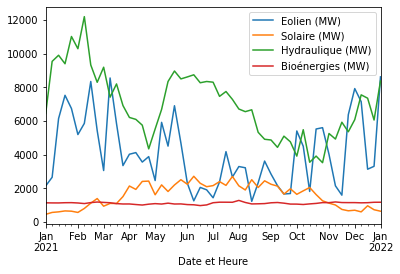

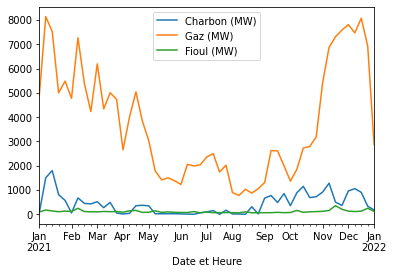

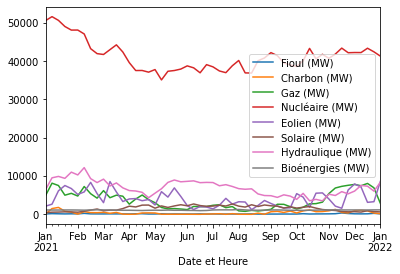

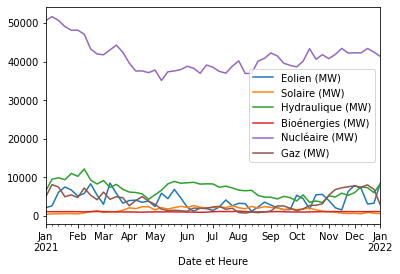

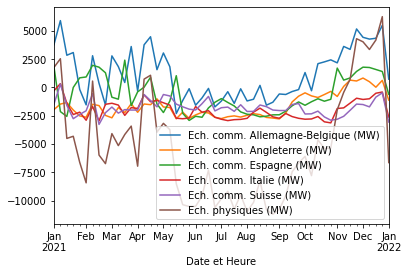

In [10]:
dataframes = [data_enr, data_fossile, data_prod, data_vert, data_export]
for df in dataframes :
    df.resample("W").mean().plot()

## Analyses des graphiques

### La production d'énergie globale 

Afin d'analyser la production d'énergie globale ainsi que les différences entre les sources d'énergie électrique française on utilise un graphique en aires, qui permet de mieux apprécier la part globale de chaque source d'énergie dans le total de production.

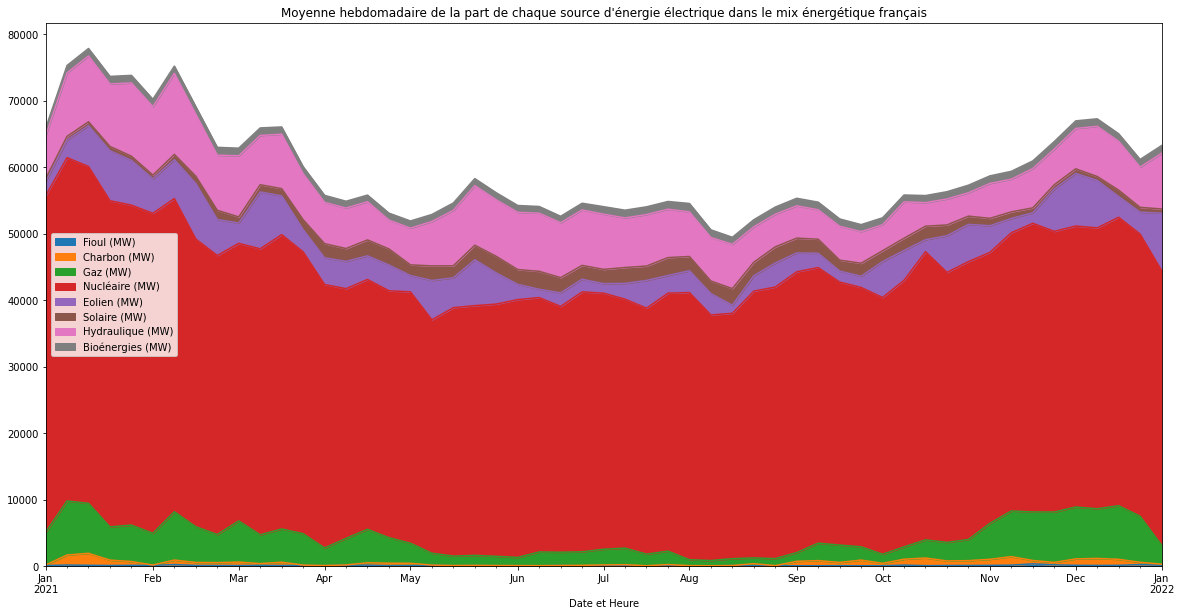

In [11]:
fig_prod_area = data_prod.resample('W').mean().plot.area(figsize=(20,10), title="Moyenne hebdomadaire de la part de chaque source d'énergie électrique"
+" dans le mix énergétique français")

La première chose qui saute rapidement aux yeux est la part importante du nucléaire dans le mix énergétique de production d'électricité. On remarque également une belle part réservée à la production hydraulique et également à l'éolien. Ces différentes part semblent relativement constantes tout au long de l'année 2021. 

On remarquera également la présence d'une belle part de production gazière, surtout durant les mois d'hiver et de début printemps. 

Pour le reste, on retiendra que la part du solaire augmente à partir de mi printemps jusqu'à mi automne. Rien d'étonnant puisque l'ensoleillement diminue en  dehors de ces périodes. 

Pour finir on remarquera une part négligeable dédiée au Charbon et au Fioul. 

En rentrant un peu plus en profondeur dans l'analyse on remarque ce qui semble être une corrélation entre la production gazière et la production solaire. Il serait tentant d'affirmer dès maintenant que les centrales à gaz servent en majorité à compenser le manque de solaire durant l'hiver, et également en cas de pic de demande sur le réseau afin de compenser le caractère non pilotable des centrales photovoltaïques. Cependant il est encore trop tôt pour affirmer une telle chose (ou même l'infirmer). En l'état nous ne pouvons considérer qu'il n'existe qu'une simple corrélation apparente entre ces deux sources d'énergie. 

Etudions maintenant l'évolution directe des valeurs moyennes au cours de l'année de ces sources d'énergie.

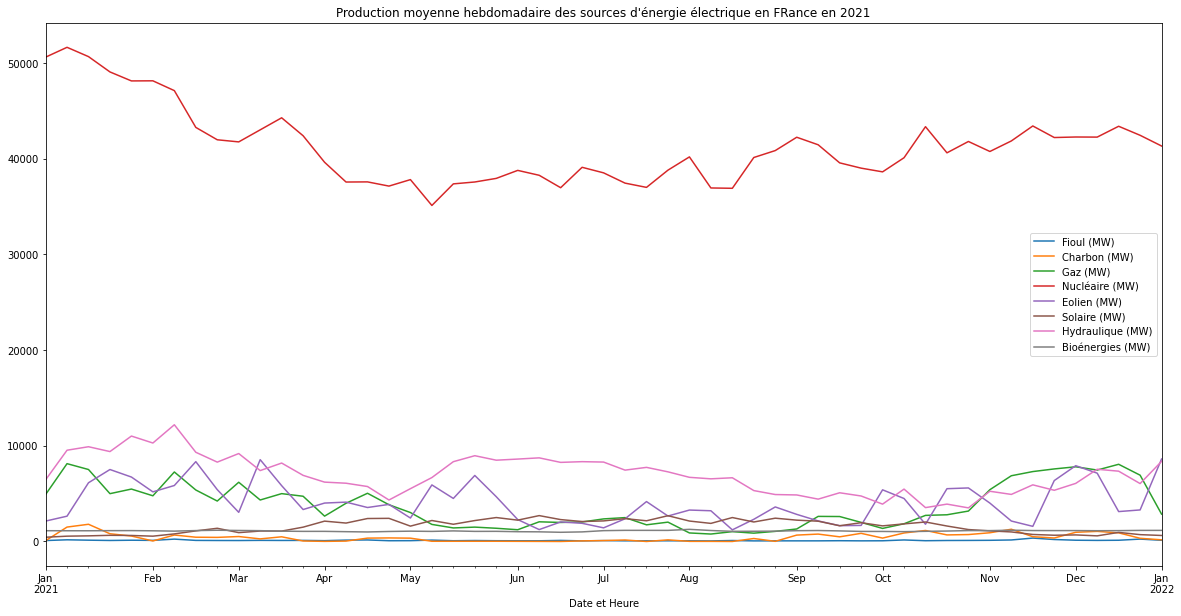

In [12]:
fig_prod = data_prod.resample('W').mean().plot(figsize = (20,10), title="Production moyenne hebdomadaire des sources d'énergie électrique en FRance en 2021")

Grâce à ce graphique nous pouvons avoir une idée plus précise de la production d'énergie par source. On remarque la même tendance que précédemment, à savoir que les sources d'électricité les plus importantes sont le nucléaire (de loin la première), l'hydraulique en second et enfin l'éolien. 

On remarque également que la production éolienne oscille au gré des semaines, et qu'elle passe par un "plateaux" minimum aux alentours de l'été notamment. 

Notons aussi que la production liée au gaz subit une forte augmentation durant les mois d'hiver, passant même devant la production hydraulique durant Novembre et Décembre 2021 ! 

Concernant les autres modes de production l'échelle n'est malheureusement pas adaptée. Qu'à cela ne tienne, nous allons les analyser séparément. Nous pouvons néanmoins retenir que la production absolue de ces méthodes est négligeable face aux quatre autres modes de production principaux. 

<AxesSubplot:title={'center':"Production d'électricité dûe aux modes de production les moins prédominants en France en 2021"}, xlabel='Date et Heure'>

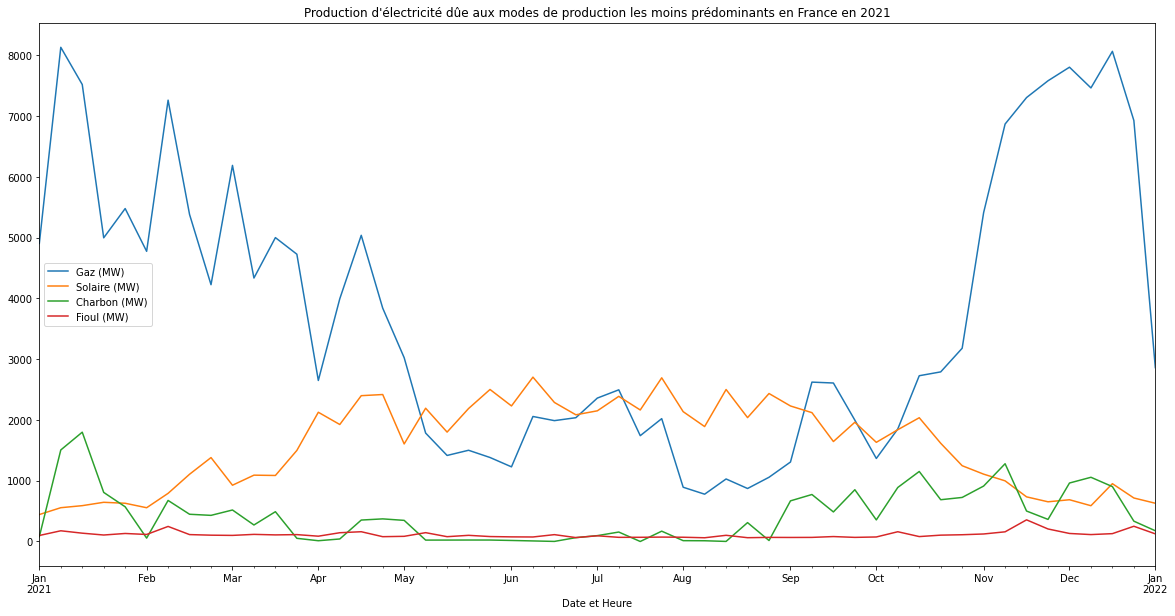

In [13]:
data_prod_faible = data_prod[['Gaz (MW)', 'Solaire (MW)', 'Charbon (MW)', 'Fioul (MW)']]
data_prod_faible.resample('W').mean().plot(figsize=(20,10), title="Production d'électricité dûe aux modes de production les moins prédominants en France en 2021")

Ce graphique est bien plus utile afin d'étudier les différentes variations de ces modes de production d'électricité. En effet on remarque assez bien sur ces graphique que la production du Fioul est très négligeable de manière générale, et que celle du charbon l'est tout autant en dehors des périodes hivernales. 

Ajoutons à cela que nous pouvons également mieux observer la corrélation qui semble exister entre production gazière et production solaire, comme nous en avions émis l'hypothèse plus haut. On remarque bien ici une augmentation de la production solaire durant les mois printaniers et éstivaux, ainsi qu'une diminution dans le même temps de la production gazière. Nous pouvons donc apporter un peu plus de crédit à notre hypothèse de base. 

Cependant, on remarque que les valeurs absolues de production ne se compense pas du tout. En effet, là ou le gaz se situe à une moyenne de 6000 MW produit sur les premiers mois de l'année, le solaire stagne à à peine 500MW, et à l'inverse en été le solaire ne grimpe "que" jusqu'à 3000MW environ alors que le gaz chute à moins de 2000MW en moyenne. Cela représente donc un gap global entre les deux énergies d'environ 1000MW, ce qui reste quand même relativement élevé. 

Plusieurs explications demeurent possibles pour expliquer ces différence. Tout d'abord une possible demande en énergie plus importante en hiver qu'en été : en effet en hiver nous avons tendance à plus chauffer, à plus manger des aliments chauds, à éclairer également plus longtemps compte tenu de la durée réduite de la journée. Tous ces élements peuvent expliquer une production globale plus importante. Peut également s'ajouter à cela que le gaz puisse compenser dans le même temps un manque de production des autres sources d'énergie. 

Il est également important de rappeler que le gaz possède un énorme avantage sur le solaire et l'éolien : il est entièrement pilotable. En cela nous entendons qu'il est possible d'augmenter ou diminuer rapidement la production, là où ce n'est pas possible de le faire avec l'éolien ou le solaire (je n'ai personnellement jamais vu personne commander aux vents ni aux nuages pour qu'il y ait plus de soleil). 

Autre donnée intéressante, les centrales à charbon fonctionne également bien plus durant ces périodes hivernales qu'en été.

Toutes ces données combinées tendent donc vers l'hypothèse que la demande en électricité est bien plus forte en hiver, et bien plus dépendante de sources pilotables à la demande.

Nous pouvons vérifier cela de manière rapide grâce aux données RTE

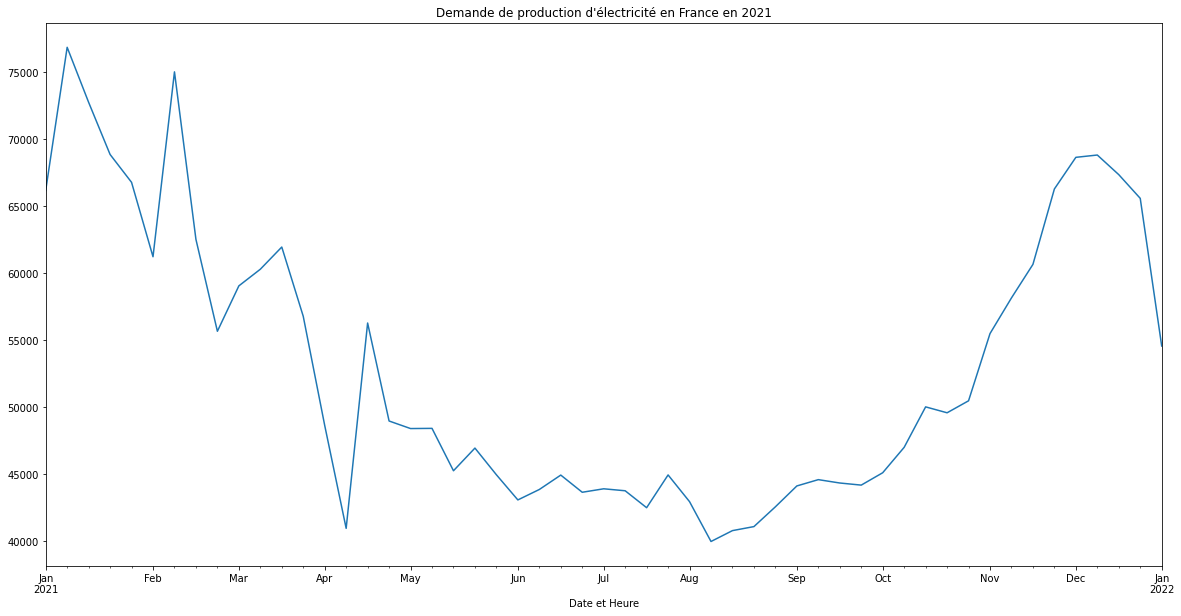

In [14]:
data_demande = data['Prévision J (MW)'].resample('W').mean().plot(figsize=(20,10), title="Demande de production d'électricité en France en 2021")

Notre précédente hypothèse semble donc juste ! En effet on observe une très nette augmentation de la production globale durant les périodes hivernales que lors des périodes estivales. En combinant ces résultats et les résultats précédents nous pouvons en tirer plusieurs choses que je vais rappeler :

* Le nucléaire est la source d'énergie privilégiée en France
* Le solaire et l'éolien semblent être compensés en cas de forte demande par les centrales à gaz et à charbon, spécialement lors des périodes hivernales
* Les centrales à Fioul représentent une part négligeable de la production française globale (mais elle existe)
* Les centrales à charbons ne semblent être utilisées qu'en cas de dernier recours, lorsque les autres modes de production ne peuvent répondre à la demande. 
* Le solaire perd de sa capacité de production durant les périodes hivernales et doit être compensé
* Les sources d'énergies renouvelables (solaire et éolien) ne sont pas pilotables et représentent donc un certain risque en cas de pic de demande et de consommation, et doivent donc être compensées par des sources fossiles pilotables (gaz et charbon en majeure partie)


# Zoom sur les énergies renouvelables (Solaire, éolien et hydraulique en particulier)

Maintenant que nous avons fait un tour d'horizon global des sources d'énergie électrique en France sur l'année 2021, nous pouvons observer plus dans le détail les sources d'énergie renouvelables, à savoir le solaire, l'éolien et l'hydraulique. 


<AxesSubplot:title={'center':"Production d'électricité via les sources renouvelable en moyenne hebdomadaire en France en 2021"}, xlabel='Date et Heure'>

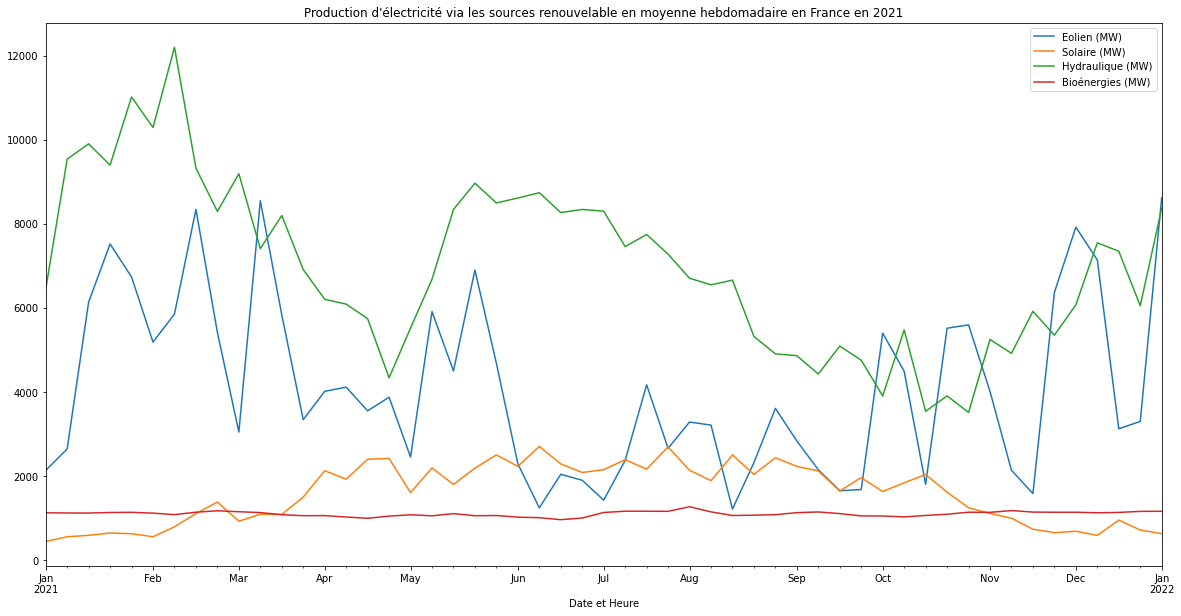

In [15]:
data_enr.resample('W').mean().plot(figsize=(20,10), title="Production d'électricité via les sources renouvelable en moyenne hebdomadaire en France en 2021")

Plusieurs choses intéressantes ressortent de ce graphique. 

Premièrement on observe une grande oscillation dans la production d'énergie éolienne au cours des semaines. Cela souligne d'autant plus la non pilotabilité de cette source d'énergie. En effet, on remarque beaucoup moins ces oscillations sur la production nucléaire par exemple. De plus, on remarque également une chute de production hydraulique à partir de Mars, qui correspond peu ou prou avec la montée de la production solaire. Notons que dans ce cadre la production d'énergie hydraulique via les barrages hydrauélectriques notamment est pilotable. Cette baisse de production est notamment liée à la baisse de la demande globale. La remontée qui suit est dûe aux compensation faites aux réacteurs nucléaires à l'arrêt durant les mois d'été à cause des fortes chaleurs, ainsi qu'à la baisse de régime de l'éolien durant cette même période. Qu'il est pratique d'avoir une source pilotable à la demande pour pallier ces manques de production de certaines sources ! 

Secondement, bien que la production d'énergie photovolaïque soit bien non pilotable, la valeur moyenne de la production hebdomadaire varie peu. En effet, sur cette source d'énergie, c'est plutôt la variation journalière qu'il est interressant d'étudier, afin de voir l'impact de la variation d'ensoleillement et de la nuit sur les produtions. Etudions les variations journalières du mois de juillet par exemple.

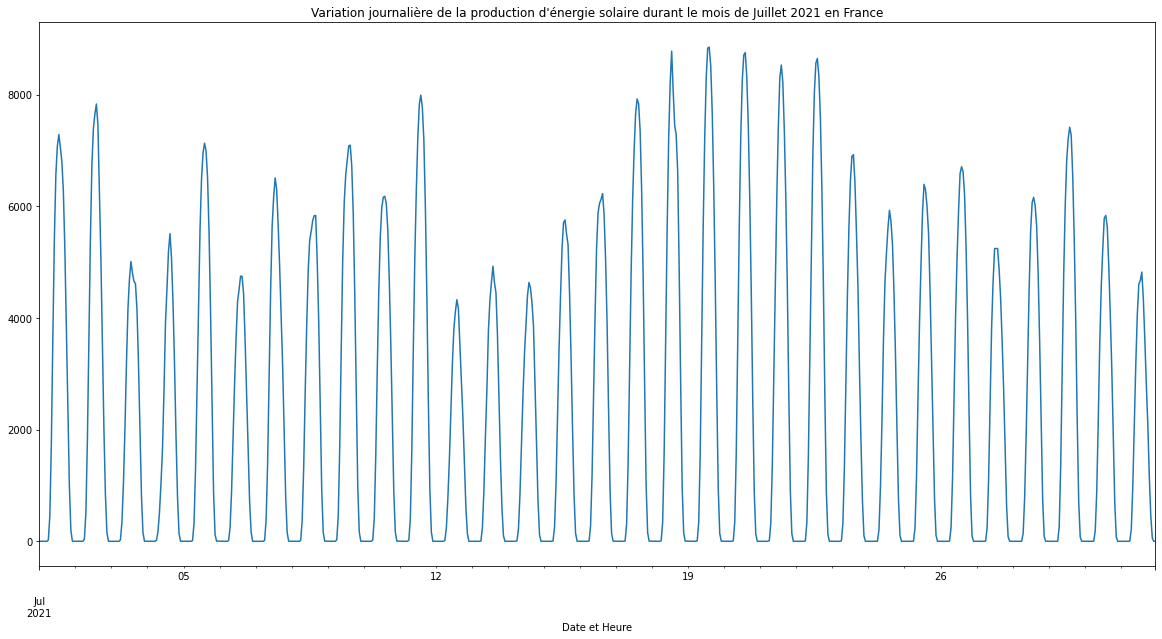

In [16]:
data_juillet_solaire = data_enr['Solaire (MW)'].loc[data_enr.index.month == 7].resample('H').mean().plot(figsize=(20,10), title="Variation journalière de la production d'énergie solaire durant le mois de Juillet 2021 en France")

La différence de production est très notable ! Comme nous pouvions nous y attendre, la nuit les panneaux solaires ne produisent rien ! Il faut donc évidemment compenser cela par une autre source d'énergie pilotable afin de pouvoir continuer à s'éclairer chez soi et d'utiliser l'électricité. 

Maintenant que nous avons pointé du doigt une des grandes limitations de l'utilisation de l'énergie solaire, analysons de plus prêt les variations journalières de production éolienne. 

<AxesSubplot:title={'center':"Production journalière d'électricité de source éolienne en France en Juillet 2021"}, xlabel='Date et Heure'>

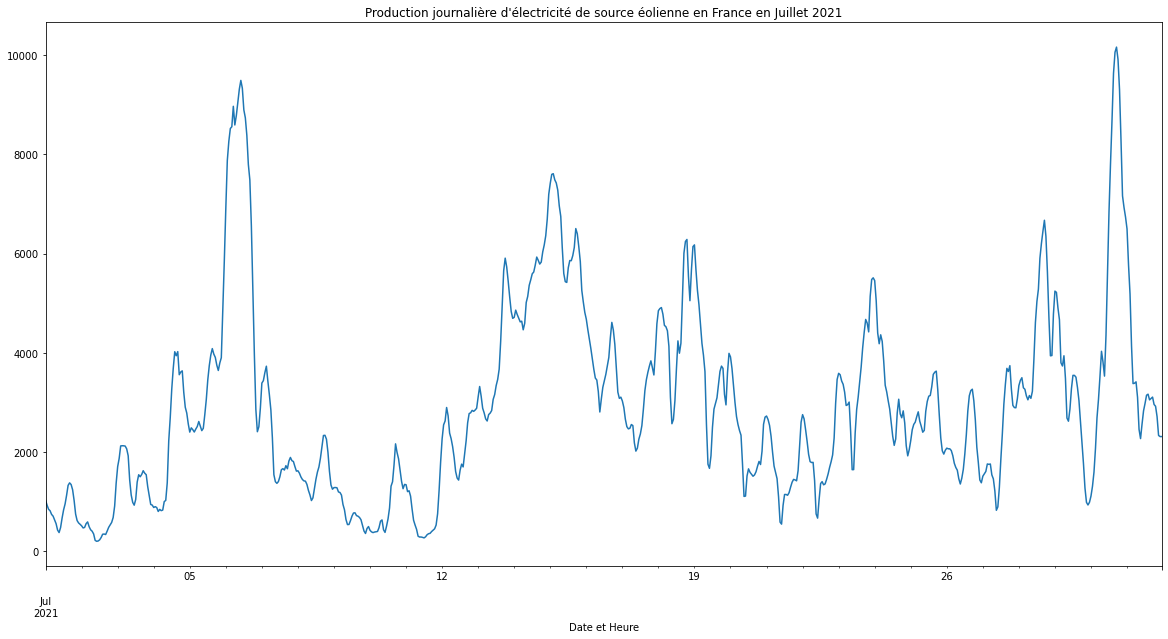

In [17]:
data_enr['Eolien (MW)'].loc[data_enr.index.month == 7].resample('H').mean().plot(figsize=(20,10), title="Production journalière d'électricité de source éolienne en France en Juillet 2021")

Grâce au graphique précédent on remarque bien que l'énergie éolienne ne souffre pas de l'écueil du solaire, à savoir une production nulle sur certains moments de la journée. En revanche on peut remarquer une grande disparité de distribution entre les différents pics de production, pouvant atteindre près de 10000 MW, et les points les plus faibles (~1000 MW). Nous observons en effet un facteur de presque 10 entre les deux zones de production, ce qui montre l'extrême sensibilité de la source éolienne aux aléas climatiques. 

Grâce aux deux derniers graphiques nous avons ainsi pu voir que les principales énergies renouvelables que le gouvernement veut à l'heure actuelle ameliorer possèdent de grosses limitations liées au caractère non pilotable de ces sources d'énergie. 

Mais, afin d'être complètement exhaustifs nous devons également analyser la production horaire des sources d'énergies dites pilotables, notamment celle du nucléaire, puisqu'il s'agit de la source que beaucoup voient comme notre seule porte de sortie de cette crise énergétique et climatique. 


<AxesSubplot:title={'center':"production horaire d'électricité nucléaire au cours du mois de juillet en France en 2021"}, xlabel='Date et Heure'>

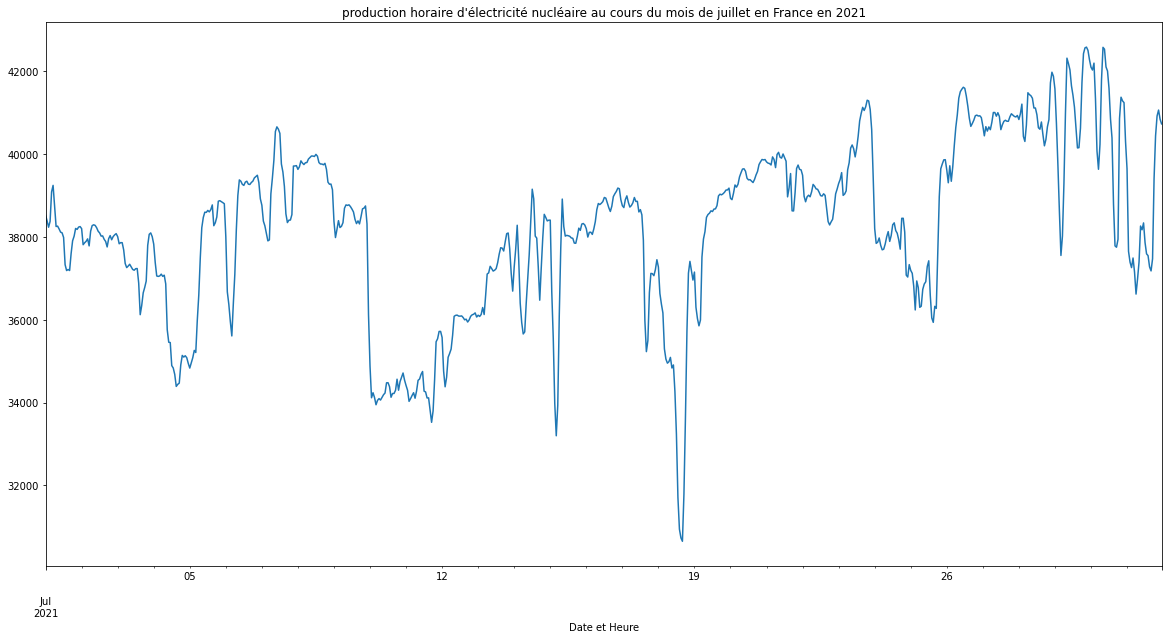

In [18]:
data_prod['Nucléaire (MW)'].loc[data_prod.index.month == 7].resample('H').mean().plot(figsize=(20,10), title="production horaire d'électricité nucléaire au cours"
+ " du mois de juillet en France en 2021")

En observant ce dernier graphe quelque chose saute aux yeux : qu'elle disparité de production entre plusieurs jours ! Pourtant le nucléaire est sensé être une énergie pilotable non ? 

Plusieurs explications à cela :
* Tout d'abord nous observons le mois de Juillet 2021 qui a été particulièrement chaud. Or, quand on parle de réacteur nucléaire, on entends également refroidissement. Et en cas de forte chaleur, la température globale des rivières augmente, ce qui ne leur permet pas de remplir leur fonction de refroidissement correctement. A partir de là, le gestionnaire français des centrales à l'obligation de fermer les réacteurs concernés afin de ne pas faire courir un risque de sécurité trop important aux centrales. Dans ce cadre, la production diminue considérablement en fonction du nombre de réacteurs fermés. 

C'est à cause de cet effet que, lors de l'été 2022, la production du parc solaire a dépassé celle du parc éolien pendant une semaine entre 10h et 16h30. en effet, 26 réacteurs étaient alors fermé à ce moment là, et l'ensoleillement était tel que la puissance convertie par le parc photovoltaïque était exceptionnelle. 

Par ces deux effets combinés on se rends bien compte des conditions environnementales hasardeuses nécessaires pour que le parc solaire produise autant voire plus d'électricité que le parc nucléaire. Combinant cet effet de hasard climatique avec la non pilotabilité intrinsèque de l'énergie solaire, on se rends bien compte qu'un parc entièrement solaire n'est pas une solution acceptable en l'état aujourd'hui, en tout cas pas tant que l'on a pas développer une solution de stockage suffisamment performante pour stocker l'énergie produite et la redistribuer à la demande. 

Bien que des pistes soient actuellement à l'étude, nous ne pouvons espérer de telles solutions de stockages avant plusieurs années en test, et à minima une dizaine d'années avant une mise en production à l'échelle industrielle. 

* Ensuite, nous pouvons également observer des fluctuations assez importantes dans la production journalière. Cet effet peut être mis en regard de la demande en énergie journalière afin d'essayer de trouver une corrélation. 


<AxesSubplot:title={'center':'Moyenne horaire de la demande en électricité en France au mois de Juillet 2021'}, xlabel='Date et Heure'>

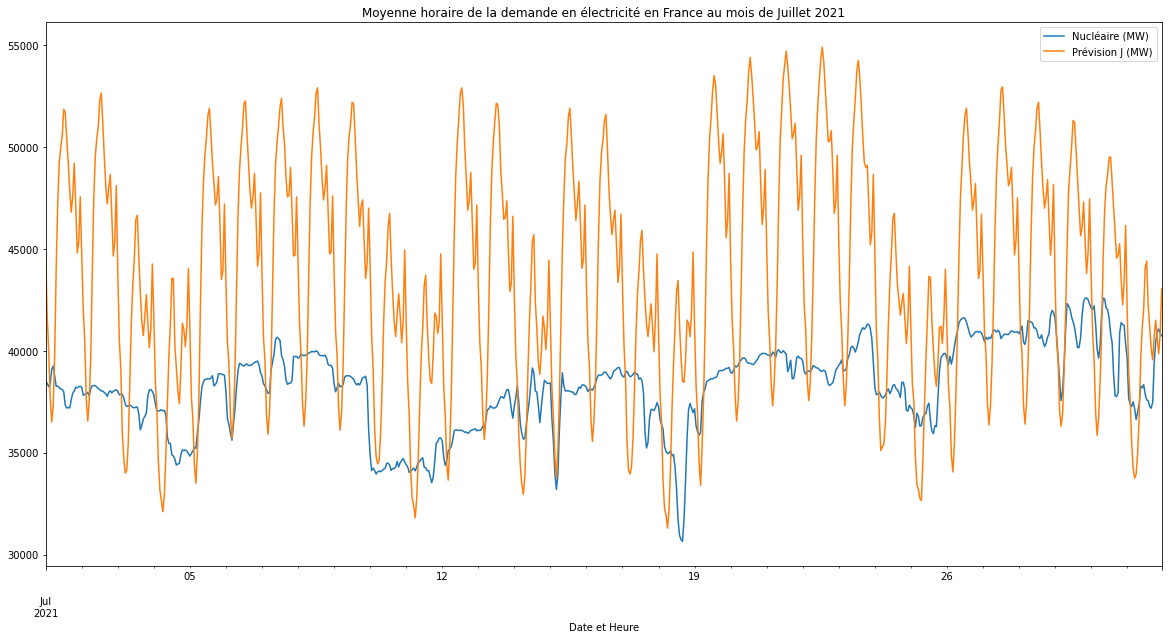

In [20]:
data[['Nucléaire (MW)', 'Prévision J (MW)']].loc[data_prod.index.month == 7].resample('H').mean().plot(figsize=(20,10), 
title="Moyenne horaire de la demande en électricité en France au mois de Juillet 2021")

En observant ce graphique, et bien que la corrélation ne soit pas parfaite on se rends bien compte que les creux les plus importants dans la production nucléaire d'électricité coïncident presque parfaitement avec la chute de demande en énergie électrique française. Ceci ne fait évidemment pas office de preuve de cause à effet mais permet de nous donner une clé supplémentaire dans la compréhension de la variation de production d'électricité nucléaire. 

En partant de ce constat, on peut soulever un point supplémentaire : l'importance de la pilotabilité de la production, ou à minima la pilotabilité de la distribution de l'énergie électrique. 

Il est possible d'étendre cette analyse aux énergies renouvelables afin d'observer si l'argument de la non pilotabilité tiens la route. 

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

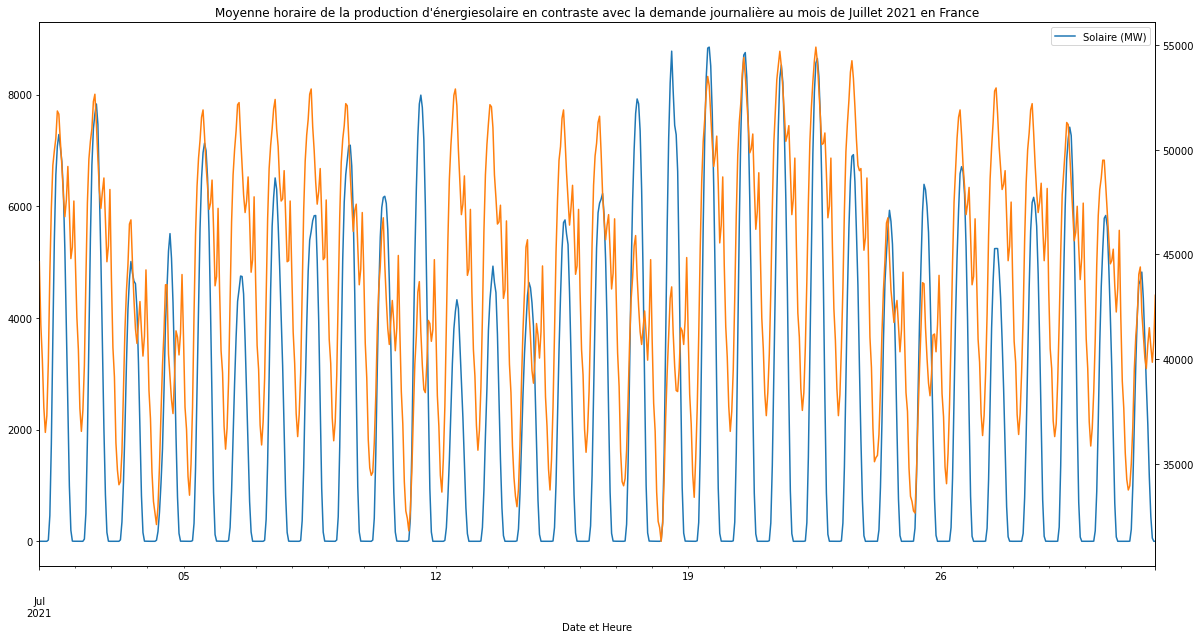

In [25]:
plt.figure()
data[['Solaire (MW)']].loc[data.index.month == 7].resample('H').mean().plot(figsize=(20,10),
title = "Moyenne horaire de la production d'énergiesolaire en contraste avec la demande journalière au mois de Juillet 2021 en France")
data['Prévision J (MW)'].loc[data.index.month == 7].resample('H').mean().plot(secondary_y = True)

Analysons ce résulat. Nous pouvons tout d'abord observer que la fluctuation de la demande en énergie suit remarquablement bien la fluactuation de la production de l'énergie solaire. Cependant il ne faut pas tomber dans le piège de se dire que l'énergie solaire est donc pilotable. En effet, bien que les fluctuations semblent extêmement bien corrélée, il ne faut pas oublier les différences d'échelle. Premier écueil, la production solaire ne diminue pas la nuit, elle devient nulle, alors que la demande ne l'est pas. Deuxième écueil, le pic de production solaire est variable, et donc sur une journée si la demande est forte mais que la production solaire ne suit pas, par manque d'ensoleillement par exemple, il y aurait un manque d'apport. 

Prenons la même étude au niveau éolien.

<AxesSubplot:>

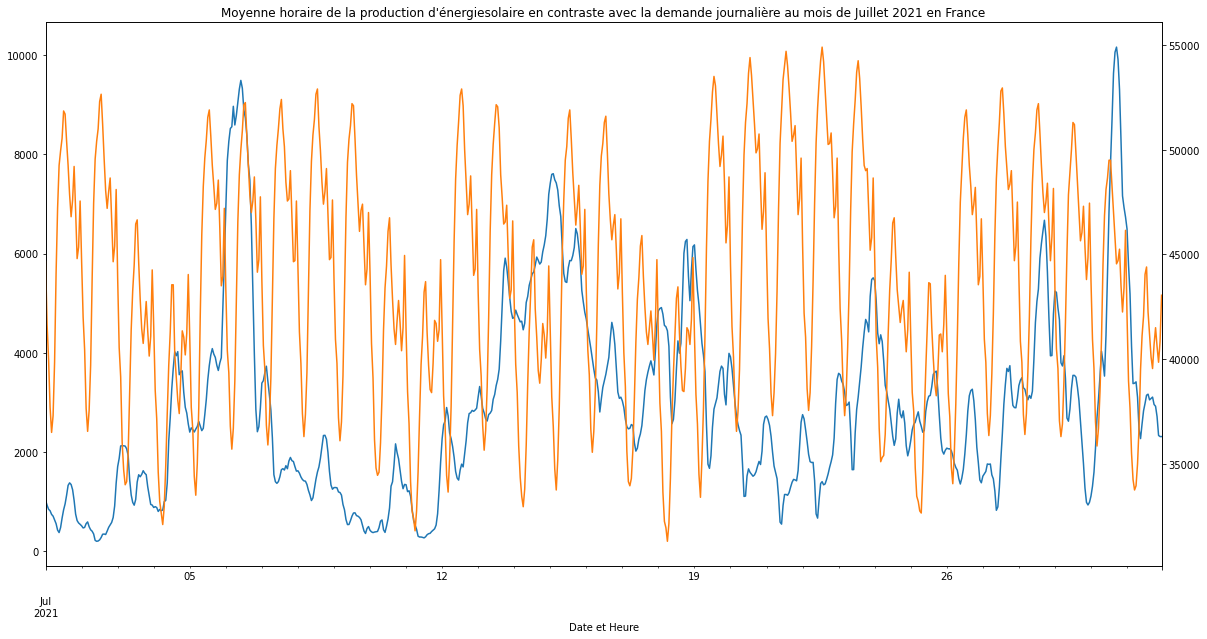

In [26]:
plt.figure()
data['Eolien (MW)'].loc[data.index.month == 7].resample('H').mean().plot(figsize=(20,10),
title = "Moyenne horaire de la production d'énergiesolaire en contraste avec la demande journalière au mois de Juillet 2021 en France")
data['Prévision J (MW)'].loc[data.index.month == 7].resample('H').mean().plot(secondary_y = True)

Cette étude est bien plus édifiante. En effet on remarque une grosse différence avec la corrélation dans la production solaire. En effet, là ou la fluctuation de la production d'énergie solaire suivait assez fidèlement la demande journalière française, la productio éolienne, elle, semble complètement décorrélée de la demande. Sur cette étude on observe bien le caractère non pilotable de la production éolienne, qui ne s'adapte pas du tout à la variation de la demande en énergie française. 

Une des première réponses qui pourrait être adoptée est d'utiliser les deux sources conjointement afin de pallier le manque de production du solaire pendant la nuit avec la production éolienne. Cependant le gros point noir de cette méthode est qu'en cas de pic de demande, ou en cas de chute pbrutale de la production éolienne ou solaire dans la journée, il serait impossible de répondre à la demande en énergie qui elle, ne s'adapte pas à la production. En effet c'est la production qui doit s'adapter à la demande et non l'inverse sous peine de souffrir de périodes d'austérité énergétique. 

## Conclusion de l'étude sur les énergies renouvelables 

Ces différentes études sur les énergies renouvelables nous apportent deux constats :

* Premièrement, la production d'énergie renouvelable est très sujette aux variation environnementales et climatiques. En effet, en l'absence de vent ou d'ensoleillement suffisant la production chute de manière très visualisable. 
* Deuxièmement, en lien avec le premier point, la demande en énergie, bien que fluctuante également et étrangement bien corrélée à la production solaire (du moins sur le mois de l'étude), n'est jamais nulle. Dans ce cadre il faut bien assurer une production énergétique constamment supérieure à un minimum. Cette problématique du minimum de production énergétiue ne peut pas trouver une réponse viable dans la production d'énergie via les énergies renouvelables en l'état. Il faudrait pour cela assurer un stockage de l'énergie excédentaire et trouver un moyen de piloter la mise à disposition de cette énergie de manière efficace et fiable tout au long de l'année, ce qui pour le moment n'est pas le cas. 
* Troisième point, la production d'énergie électrique via des sources renouvelable n'est pas pilotable et a donc besoin d'un back-up via d'autre énergies non renouvelables (notamment nucléaire qui assure la majeure partie de la production d'électricité française tout au long de l'année).


Nous avons vu ces derniers jours différents scénarii développés sur les années à venir concernant l'évolution du mix énergétique français dans les années à venir. Certains de ces scénarios présentent un mix utilisant quasiment 100% d'énergies renouvelables et semble plutôt bien étoffés sur ces questions de la non pilotabilité des énergies renouvelables, notamment en prenant en compte un back up énergétique assuré par l'énergie hydraulique et une augmentation drastique de la production d'énergie via les sources renouvelables. 

L'état de l'art étant fait sur la production actuelle d'énergie en France, nous pouvons à présent nous concentrer sur les autres axes d'études concernant la production d'énergie française, notamment les différents impacts écologiques (émission de gaz à effet de serre (GES), l'aire de production dédiée, les déchets engendrées et l'impact sur les écosystèmes) ainsi que sur les futures évolutions potentielles dans le cadre de la production d'énergie. 

Il est important de rappeler également qu'une remise en question de notre consommation énergétiue doit être fournie pour que ces scénarii soient viables et mis en place, chacun à son échelle, mais nous détaillerons cela plus tard. 


# Impacts environnementaux des différentes sources d'énergies

## Rappels

Afin de mener l'étude des impacts environnementaux nous devons disposer de plusieurs données :
* Premièrement nous nous intéresserons en particulier à l'émission de GES directement liés à la production (c'est à dire sans tenir compte du cycle de vie des installations et autres vecteurs d'énergie utilisés dans la production). Pour cela nous disposons des données issue de la base de données nationale Base Carbone qui regroupent ces données selon les sources d'énergies
* Deuxièmement nous nous intéresserons à l'émission de GES en ce qui concerne la construction des installations et l'extraction des ressources nécessaires à la production énergétique
* Troisèmement nous étudierons l'impact écologique de la fin de vie des installations (gestion des déchets, démantèlement, recyclage, etc)
* Quatrièmement, nous assemblerons toutes les données précédemment recueillies afin d'établir un état de la production en prenant en compte l'entièreté du cycle de production et de vie des installations afin d'avoir les données les plus complètes et factuelles possibles concernant l'impact écologique des différentes sources d'énergie 

## Etude sur l'émission de GES directement liée à la production d'énergie 

### Récupération des données d'émission par source d'énergie

Les données concernant l'émission des différentes sources d'énergie électrique sont disponibles publiquement via la base de données publique Base Carbone. Cette base de données nous apporte les éléments suivants :

* Tout d'abord la valeur moyenne d'émission par kWh en production, en tenant compte du cycle de vie complet de l'installation. Ceci comprends la construction des installations, l'extraction des ressources nécessaires et le fonctionnement nominal
* En creusant un peu, on trouve une ventilation de cette donnée entre "production" et "amont", qu'il faut comprendre par "En fonctionnement" et "en tenant compte de toutes les émissions sur le cycle de vie du produit"*

_(*) Note : Pour le solaire et l'éolien, l'ADEME précise dans la documentation de la base carbone que : "Remarque : afin d’assurer une cohérence de périmètre de comptabilisation avec les autres
facteurs d’émissions « énergie » présents dans la Base Carbone®, les phases de démantèlement
et fin de vie des ouvrages ne sont pas intégrées dans les facteurs d’émission retenus." pour les installations solaires et éoliennes._


Pour le moment nous ne nous intéresserons qu'à l'émission de GES pendant le fonctionnement, et nous incluerons l'ensemble du cycle de vie par la suite.

Nous pouvons d'ores et déjà regrouper les données dans un tableau :

| Source d'énergie             | émission globale (kg/kWh) (Source : Base Carbone) | Emission en production (kg/kWh) (Source : Base Carbone)  |
|------------------------------|:-------------------------------------------------:|:--------------------------------------------------------:|
| Charbon                      |                        1.06                       |                           0.969                          |
| Fioul                        |                        0.73                       |                           0.628                          |
| Gaz                          |                       0.418                       |                           0.351                          |
| Eolien Terrestre             |                       0.0141                      |                            0.0                           |
| Eolien en Mer                |                       0.0156                      |                            0.0                           |
| Hydraulique                  |                       0.006                       |                            0.0                           |
| Solaire (fabrication Chine)  |                       0.0439                      |                            0.0                           |
| Solaire (fabrication Europe) |                       0.0323                      |                            0.0                           |
| Solaire (fabrication France) |                       0.0252                      |                            0.0                           |
| Nucléaire                    |                       0.006                       |                            0.0                           |

Nous pouvons à présent constituer une petite "base de données" contenant ces informations :

In [27]:
list_src = ["Charbon", "Fioul", "Gaz", "Eolien Terrestre","Eolien en mer", "Hydraulique", "Solaire (chine)", "Solaire (Europe)", "Solaire (France)", "Nucléaire"]
list_em_tot = [1.06,0.73,0.418,0.0141,0.0156,0.006,0.0439,0.0323,0.0252,0.006]
list_em_prod = [0.969,0.628,0.351,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

data_emission = pd.DataFrame( {
    "Source d'énergie" : list_src,
    "Emission totale (kg/kWh)" : list_em_tot,
    "Emission en production (kg/kWh)" : list_em_prod
})

data_emission

,Source d'énergie,Emission totale (kg/kWh),Emission en production (kg/kWh)
0,Charbon,1.0600,0.969
1,Fioul,0.7300,0.628
2,Gaz,0.4180,0.351
3,Eolien Terrestre,0.0141,0.000
4,Eolien en mer,0.0156,0.000
5,Hydraulique,0.0060,0.000
6,Solaire (chine),0.0439,0.000
7,Solaire (Europe),0.0323,0.000
8,Solaire (France),0.0252,0.000
9,Nucléaire,0.0060,0.000


Maintenant que cette base est constituée nous pouvons l'améliorer avec les données précédemment obtenues, notamment en compilant l'émission totale en production, et l'émission totale en tenant compte de l'ensemble du cycle de vie. Concernant le parc solaire, l'ADEME indique que la valeur à utiliser par défaut est "Solaire (Chine)". Concernant l'éolien, nous n'avons pas la proportion de chaque technologie concernant le parc éolien français, nous pouvons par défaut utiliser un ratio de 70/30, avec 70% d'éolien terrestre et 30% d'éolien maritime. 